In [1]:
from DataParser import get_df_list

# df's containing only the signals captured when the machine is touching
df_list = get_df_list()

## Data Visualization

-0.08348596643518519


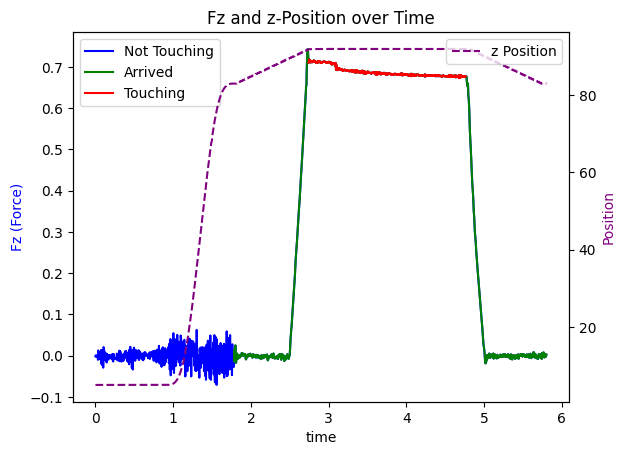

In [2]:
from DataParser import clean_df
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Dataset/20250205_082609_HIST_006_CPXE_1.csv')
df = clean_df(df)

 
mean = np.array(df[df['isArrived_Festo'] == 1]["Fz"])[:50].mean()
print(mean)
df["Fz"] = df["Fz"] - mean

touching_rows = df[df['isTouching_SMAC'] == 1]
arrived_rows = df[df['isArrived_Festo'] == 1]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis

df.plot(x='t', y='Fz', color='blue', label='Not Touching', ax=ax1)
arrived_rows.plot(x='t', y='Fz', color='green', label='Arrived', ax=ax1)
touching_rows.plot(x='t', y='Fz', color='red', label='Touching', ax=ax1)
df.plot(x='t', y='posz', color='purple', linestyle='dashed', label='z Position', ax=ax2)

# Labels and legends
ax1.set_xlabel('time')
ax1.set_ylabel('Fz (Force)', color='blue')
ax2.set_ylabel('Position', color='purple')

# Adjust legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Fz and z-Position over Time')
plt.show()


## Energy calculation + Signals have different support

In [3]:
sorted_dfs = sorted(df_list, key=len, reverse=True)
print(", ".join(str(len(df)) for df in sorted_dfs[:100]))  # print number of points in the longest 100 signals

1858, 1035, 1022, 1021, 1021, 1020, 1020, 1019, 1019, 1017, 1016, 1015, 1015, 1015, 1014, 1014, 1013, 1013, 1012, 1012, 1012, 1011, 1011, 1011, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1009, 1009, 1009, 1009, 1008, 1008, 1008, 1008, 1008, 1008, 1008, 1008, 1007, 1007, 1007, 1007, 1007, 1007, 1007, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1006, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1005, 1004


In [2]:
import numpy as np

df_max_energy = (0, None)  # (energy, df_max_energy)


def calculate_energy(df):
    global df_max_energy
    energy = np.sum(df['Fz'] ** 2) / len(df)  # energy density instead of energy

    if energy > df_max_energy[0]:
        df_max_energy = (energy, df)

    x = df['posx'].iloc[0]
    y = df['posy'].iloc[0]
    return x, y, energy


# Calculate energy for each df
energies = []
for df in df_list:
    result = calculate_energy(df)
    energies.append(result)

# Convert to numpy array
energies = np.array(energies)
print(energies.shape)

(6561, 3)


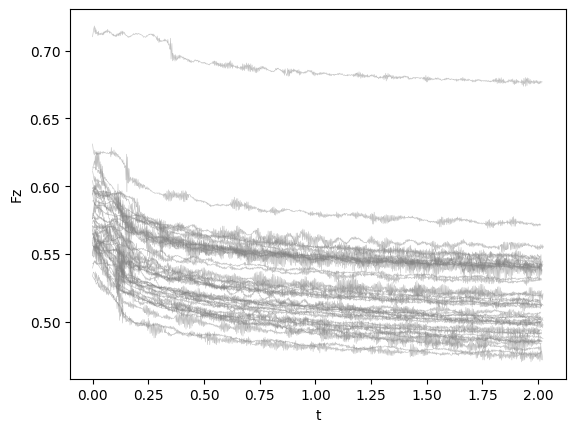

In [3]:
import random
import matplotlib.pyplot as plt

# Randomly select 40 DataFrames from df_list and add the max Energy df
sampled_dfs = random.sample(df_list, 40)
sampled_dfs.append(df_max_energy[1])

fig, ax = plt.subplots()

for df in sampled_dfs:
    df.plot(x='t', y='Fz',
            color='gray',  # Set color to gray
            alpha=0.5,  # Add some transparency
            linewidth=0.4,  # Very thin lines
            legend=False,  # Don't show legend for each line
            ax=ax)  # Use the same axis

plt.xlabel('t')
plt.ylabel('Fz')
plt.show()

## Plot points location in the plane

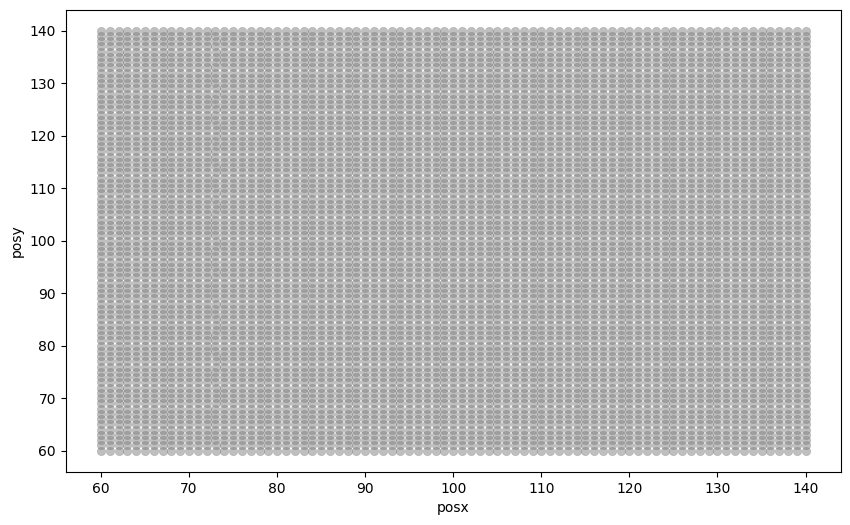

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each CSV file
for df in df_list:
    first_row = df.iloc[0]  # Get the first row, assuming x-y doesn't change over the acquisition
    ax.scatter(first_row['posx'], first_row['posy'],
               color='gray', alpha=0.5, linewidth=0.4)

# Labels and show plot
plt.xlabel('posx')
plt.ylabel('posy')
plt.show()

## Energies calculations and Plot

In [7]:
unique_sorted_values = np.sort(np.unique(energies[:, 2]))

# Get the top 30 largest values
print(unique_sorted_values[-30:])

print(energies[:, 0].min(), energies[:, 0].max())  # x bounds
print(energies[:, 1].min(), energies[:, 1].max())  # y bounds 
print(energies[:, 2].min(), energies[:, 2].max())  # energy bounds 

[0.26662586 0.26673088 0.26753569 0.26800289 0.26997184 0.2711163
 0.27158044 0.27212431 0.27511683 0.27538082 0.27625994 0.2768535
 0.27912003 0.27913157 0.27928945 0.28335322 0.28347382 0.28639298
 0.28832629 0.2889893  0.2890405  0.29517229 0.30099375 0.30300522
 0.30565532 0.32400979 0.32599295 0.32853683 0.32938196 0.36546421]
59.999 140.0
59.999 140.0
0.1415190504283536 0.36546420747951475


In [4]:
%matplotlib notebook 

xmin, xmax = 55, 145
ymin, ymax = 55, 145
emin, emax = 0.14, 0.366

filtered_energies = np.array(list(
    filter(lambda energy: xmin < energy[0] < xmax and ymin < energy[1] < ymax and emin < energy[2] < emax,
           energies)))  # select x-y-energy range to plot

print(filtered_energies.shape)

z_scale_factor = 30  # Increase this to stretch z visually
min_energy = filtered_energies[:, 2].min()
max_energy = filtered_energies[:, 2].max()
filtered_energies[:, 2] = (filtered_energies[:, 2] - min_energy) / (max_energy - min_energy) * z_scale_factor

# Create interactive 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

zmin, zmax = filtered_energies[:, 2].min(), filtered_energies[:, 2].max()
ax.set_box_aspect([xmax - xmin, ymax - ymin, zmax - zmin])  # Keeps X and Y scales equal

trisurf = ax.plot_trisurf(filtered_energies[:, 0], filtered_energies[:, 1], filtered_energies[:, 2],
                          cmap='viridis',
                          edgecolor='none',  # Removes grid lines for a smoother surface look
                          alpha=0.8)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Normalized Energy Scaled')

fig.colorbar(trisurf, label='Normalized Energy Scaled')
plt.title('Signal Energy Distribution (Interactive)')

plt.show()

(6537, 3)


<IPython.core.display.Javascript object>